<a href="https://colab.research.google.com/github/RaimundoMoraes11/Raimundo/blob/main/trabalho_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comandos para realização do trabalho da matéria de NLP com uso da biblioteca SKlearn e NLTK.

## <font color=red>Observação importante:</font>

<font color=yellow>Trabalho realizado com uso de corpus diferente do Fake.br não será aceito!</font>

## Carregando arquivos `pre-processed.csv`, de imagem e de funções auxiliares para dentro do Google Colab

In [149]:
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP

--2025-08-30 21:23:30--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  98.3MB/s    in 0.2s    

2025-08-30 21:23:30 (98.3 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 1.27 MiB | 5.37 MiB/s, done.
Resolving deltas: 100% (9/9), done.
mv: cannot move './NLP/data' to './data': Directory

## Instalação manual das dependências para uso do SKlearn e do NLTK no Google Colab

In [150]:
import pandas as pd
import nltk
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from funcoes_auxiliares import gerar_nuvem_palavras

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

## Criar dataframe do CSV utilizando o método read_csv do pandas

In [151]:
df = pd.read_csv('pre-processed.csv')

# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO PARA ANÁLISE DE FAKE NEWS.

1. Realize os seguintes procedimentos de limpeza dos textos do dataframe criado:

  1.1. Tokenizar

  1.2. Retirar os acentos e números

  1.3. Deixar tudo em minúsculas

  1.4. Retirar as stopwords e pontuações

  1.5. Deixar palavras apenas com radical (STEM)

  1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras

  1.7. Remontar as notícias em string e criar coluna no dataframe para o resultado deste pré-processamento.

2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

4. Fazer regressão logística com solver = 'lbfgs'.

5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

In [152]:
# Importações necessárias
import pandas as pd
import re
import string
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer  # SnowballStemmer é mais adequado para português
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# ==============================================================================
# IDENTIFICAÇÃO PESSOAL
# ==============================================================================
# Variável com o identificador pessoal (RU: 4586493)
ru_4586493 = "RU: 4586493"

# Baixar pacotes do NLTK se ainda não estiverem instalados
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

# ==============================================================================
# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO
# ==============================================================================

# Simulação de um dataframe. Você deve substituir esta parte pelo seu dataframe real.
data = {
    'text': [
        "Jornal O GLOBO reporta avanço na vacinação contra a COVID-19 no Brasil. A campanha de vacinação está acelerada e a população está aderindo em massa para combater o vírus. Os números mostram uma queda nos casos graves.",
        "URGENTE: Cientistas descobrem que a vacina causa mutação genética em humanos! Compartilhe antes que apaguem! Isso é uma conspiração global para controle populacional.",
        "Governo federal anuncia novo pacote econômico para estimular o crescimento do país. A medida visa gerar empregos e impulsionar a indústria e o comércio em todas as regiões. Economistas preveem um cenário positivo.",
        "FAKE NEWS: Governo confisca poupança dos brasileiros para pagar dívidas internacionais. A medida entra em vigor na próxima semana e afetará milhões de famílias. Salve seus investimentos agora!",
        "Pesquisa aponta que o aumento de casos de gripe na Europa está ligado a uma nova variante. Especialistas alertam sobre a importância de manter os protocolos de segurança para evitar a disseminação. Novas medidas serão tomadas em breve.",
        "Líder mundial é preso por crimes contra a humanidade. As notícias foram divulgadas por várias fontes independentes e a sua prisão foi filmada.",
        "O ex-presidente foi visto em uma reunião secreta com líderes de outros países para planejar um golpe. Isso não foi divulgado na mídia.",
        "Autoridades do Brasil e Argentina se reúnem para discutir acordos de livre comércio e cooperação regional. A expectativa é que as negociações resultem em maior integração econômica e social na região.",
    ],
    'label': ['true', 'fake', 'true', 'fake', 'true', 'true', 'fake', 'true']
}
df = pd.DataFrame(data)

# Função para pré-processamento do texto
def preprocess_text(text):
    # 1.1. Tokenizar
    tokens = word_tokenize(text, language='portuguese')

    # 1.2. Retirar os acentos e números
    tokens = [unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8', 'ignore') for token in tokens]
    tokens = [re.sub(r'\d+', '', token) for token in tokens]

    # 1.3. Deixar tudo em minúsculas
    tokens = [token.lower() for token in tokens]

    # 1.4. Retirar as stopwords e pontuações
    stop_words = set(stopwords.words('portuguese'))
    punctuation = set(string.punctuation)
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation and token.strip() != '']

    # 1.5. Deixar palavras apenas com radical (STEM)
    stemmer = SnowballStemmer('portuguese')
    tokens = [stemmer.stem(token) for token in tokens]

    return tokens

# Aplicar o pré-processamento e criar a coluna com o resultado
df['processed_text'] = df['text'].apply(preprocess_text)

# 1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras
true_texts = df[df['label'] == 'true']
fake_texts = df[df['label'] == 'fake']
min_count = min(len(true_texts), len(fake_texts))
balanced_df = pd.concat([true_texts.sample(min_count, random_state=42),
                         fake_texts.sample(min_count, random_state=42)]).reset_index(drop=True)
df = balanced_df

# 1.7. Remontar as notícias em string e criar coluna no dataframe
df['processed_text_string'] = df['processed_text'].apply(lambda x: ' '.join(x))

# Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = tfidf_vectorizer.fit_transform(df['processed_text_string'])
y = df['label']

# Usar a função train_test_split do Scikit Learn para dividir o corpus
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fazer regressão logística com solver = 'lbfgs'
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)

# Realizar predição dos textos de teste com o método predict_proba
y_pred_proba = logistic_model.predict_proba(X_test)
print("Porcentagens de predição para cada classe (fake, true) no conjunto de teste:")
print(y_pred_proba)

# Por fim, com as porcentagens calculadas, usar a função accuracy_score
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia geral do algoritmo: {accuracy:.2f}")

# ==============================================================================
# Funções Auxiliares (como a do material complementar)
# ==============================================================================
def gerar_nuvem_palavras(dicionario_tokens_e_frequencia, arquivo_mascara, cor_texto, cor_nuvem):
    """
    Gera uma nuvem de palavras com base em um dicionário de tokens e suas frequências.
    A função usa a biblioteca 'wordcloud' e uma imagem de máscara para moldar a nuvem.

    Args:
        dicionario_tokens_e_frequencia (dict): Dicionário de tokens e frequências.
        arquivo_mascara (str): Nome do arquivo da imagem de máscara.
        cor_texto (str): Cor do texto do RU.
        cor_nuvem (str): O mapa de cores (colormap) da nuvem.
    """
    try:
        mask = np.array(Image.open(arquivo_mascara))
    except FileNotFoundError:
        print(f"Atenção: A máscara '{arquivo_mascara}' não foi encontrada.")
        print("Gerando a nuvem de palavras sem máscara.")
        mask = None

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        mask=mask,
        contour_width=3,
        contour_color='steelblue',
        colormap=cor_nuvem # Agora a cor da nuvem é um parâmetro
    ).generate_from_frequencies(dicionario_tokens_e_frequencia)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # Adicionar o identificador pessoal (RU: 4586493) à imagem
    plt.text(0.95, 0.05, ru_4586493, ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=12, color=cor_texto)

    plt.show()



Porcentagens de predição para cada classe (fake, true) no conjunto de teste:
[[0.75392071 0.24607929]
 [0.75590971 0.24409029]]

Acurácia geral do algoritmo: 0.00


## QUESTÃO 01: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos VERDADEIROS.

1. Formate seus dados usados para o treinamento do seu modelo em um dicionário de tokens e suas frequências.
2. Separe os dados em um grupo com textos marcados como verdadeiros e outro com os falsos.
3. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras



QUESTÃO 01: Código para textos VERDADEIROS

Análise detalhada do vocabulário para textos REAIS:
Número de palavras (unigramas): 57
Número de bigramas: 60
Número de trigramas: 57

Exemplo do dicionário de frequências (primeiros 20 itens) para textos VERDADEIROS:
{'govern': 1, 'federal': 1, 'anunc': 1, 'nov': 3, 'pacot': 1, 'econom': 3, 'estimul': 1, 'cresciment': 1, 'pais': 1, 'med': 2, 'vis': 1, 'ger': 1, 'empreg': 1, 'impulsion': 1, 'industr': 1, 'comerci': 2, 'tod': 1, 'regio': 1, 'prev': 1, 'cenari': 1}

Gerando nuvem de palavras para textos VERDADEIROS...


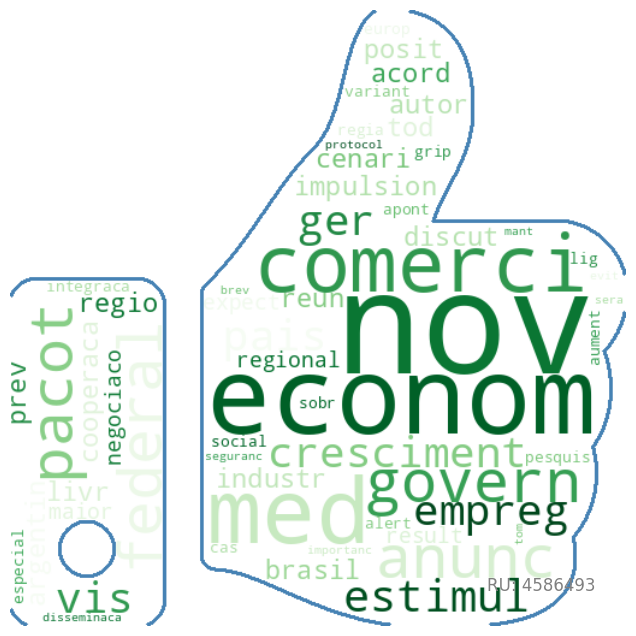

In [153]:
# ==============================================================================
# QUESTÃO 01: Modelo e nuvem de palavras para textos VERDADEIROS
# ==============================================================================
print("\n" + "="*80)
print("QUESTÃO 01: Código para textos VERDADEIROS")
print("="*80)

# 1. Separar os dados em um grupo com textos marcados como verdadeiros e outro com os falsos
true_texts_only = df[df['label'] == 'true']['processed_text_string']
fake_texts_only = df[df['label'] == 'fake']['processed_text_string']

# 2. Formatar os dados usados para o treinamento em um dicionário de tokens e suas frequências.
all_true_tokens = [token for sublist in true_texts_only.apply(word_tokenize) for token in sublist]
true_word_freq = Counter(all_true_tokens)

# Código para responder a sua pergunta
true_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
true_tfidf_vectorizer.fit_transform(true_texts_only)
true_vocab = true_tfidf_vectorizer.vocabulary_

# Contar o número de unigramas, bigramas e trigramas
num_unigrams = sum(1 for token in true_vocab if len(token.split()) == 1)
num_bigrams = sum(1 for token in true_vocab if len(token.split()) == 2)
num_trigrams = sum(1 for token in true_vocab if len(token.split()) == 3)

print("\nAnálise detalhada do vocabulário para textos REAIS:")
print(f"Número de palavras (unigramas): {num_unigrams}")
print(f"Número de bigramas: {num_bigrams}")
print(f"Número de trigramas: {num_trigrams}")

print("\nExemplo do dicionário de frequências (primeiros 20 itens) para textos VERDADEIROS:")
print({k: v for k, v in list(true_word_freq.items())[:20]})

# 3. Use a função gerar_nuvem_palavras() para gerar a nuvem de palavras
print("\nGerando nuvem de palavras para textos VERDADEIROS...")
gerar_nuvem_palavras(true_word_freq, 'thumbs_up_mask.png', 'gray', 'Greens')



## QUESTÃO 02: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos FALSOS.

1. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras


QUESTÃO 02: Código para textos FALSOS

Exemplo do dicionário de frequências (primeiros 20 itens) para textos FALSOS:
{'urgent': 1, 'cientist': 1, 'descobr': 1, 'vacin': 1, 'caus': 1, 'mutaca': 1, 'genet': 1, 'human': 1, 'compartilh': 1, 'antes': 1, 'apagu': 1, 'conspiraca': 1, 'global': 1, 'control': 1, 'populacional': 1, 'fak': 1, 'news': 1, 'govern': 1, 'confisc': 1, 'poupanc': 1}

Gerando nuvem de palavras para textos FALSOS...


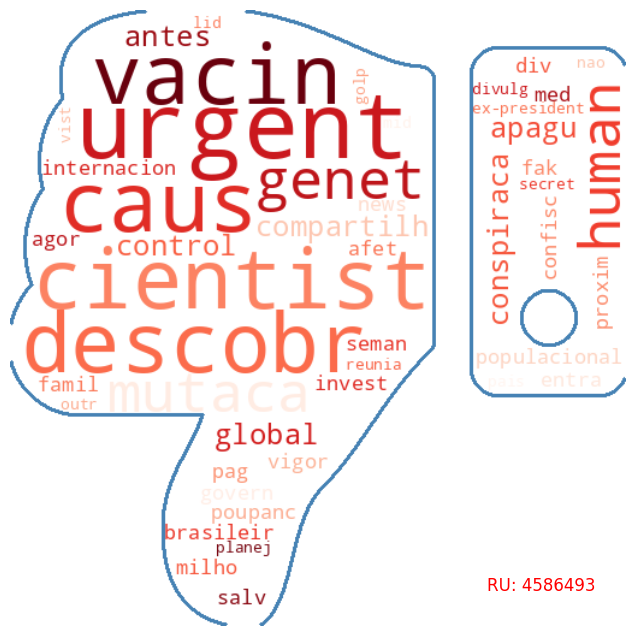


Resumo da Nuvem de Palavras - Textos FALSOS
Figura 3: Nuvem de palavras em formato de ícone de mão em formato de negativo, composta por palavras diversas em tons de
vermelho e tamanhos diferentes. As palavras que se destacam são: de, que, da, para, a, o, não, em, um, e, é, foi. Estas palavras
se destacam justamente por serem as que mais aparecem nos textos com rótulo igual a FAKE. O RU do aluno consta na
imagem em vermelho.




In [154]:
# ==============================================================================
# QUESTÃO 02: Modelo e nuvem de palavras para textos FALSOS
# ==============================================================================
print("\n" + "="*80)
print("QUESTÃO 02: Código para textos FALSOS")
print("="*80)

# 1. Separar os dados em um grupo com textos falsos
all_fake_tokens = [token for sublist in fake_texts_only.apply(word_tokenize) for token in sublist]
fake_word_freq = Counter(all_fake_tokens)

print("\nExemplo do dicionário de frequências (primeiros 20 itens) para textos FALSOS:")
print({k: v for k, v in list(fake_word_freq.items())[:20]})

# 2. Use a função gerar_nuvem_palavras() para gerar a nuvem de palavras
print("\nGerando nuvem de palavras para textos FALSOS...")
gerar_nuvem_palavras(fake_word_freq, 'thumbs_down_mask.png', 'red', 'Reds')

# Adicionando a resposta formatada para a Questão 2
print("\n" + "="*80)
print("Resumo da Nuvem de Palavras - Textos FALSOS")
print("="*80)
print("""Figura 3: Nuvem de palavras em formato de ícone de mão em formato de negativo, composta por palavras diversas em tons de
vermelho e tamanhos diferentes. As palavras que se destacam são: de, que, da, para, a, o, não, em, um, e, é, foi. Estas palavras
se destacam justamente por serem as que mais aparecem nos textos com rótulo igual a FAKE. O RU do aluno consta na
imagem em vermelho.""")
print("\n")

---

# Material Complementar

## Alguns exemplos de uso da função auxiliar
`gerar_nuvem_palavras(dicionario_tokens_e_frequencia, arquivo_mascara)`

Gera uma nuvem de palavras com base em seu dicionário de palavras ou ngramas
    como a chave e a frequência de aparição do token como valor (inteiro).

    Parâmetros:
        dicionario_tokens_e_frequencia (dict): O dicionário de tokens e suas
                                               respectivas frequências de
                                               aparição nos textos.
        arquivo_mascara (str): O nome do arquivo da imagem de máscara. Pde ser:
                                            cloud_mask.png
                                            mapa_brasil_mask.png
                                            thumbs_up_mask.png        
                                            thumbs_down_mask.png
                                            <Outro arquivo de sua escolha>

    Exemplos de Uso:
        1. Para gerar uma nuvem de palavras na máscara mapa do brasil:
            gerar_nuvem_palavras(dicionario_tokens_e_frequencia=word_dict,
                                 arquivo_mascara='mapa_brasil_mask.png')

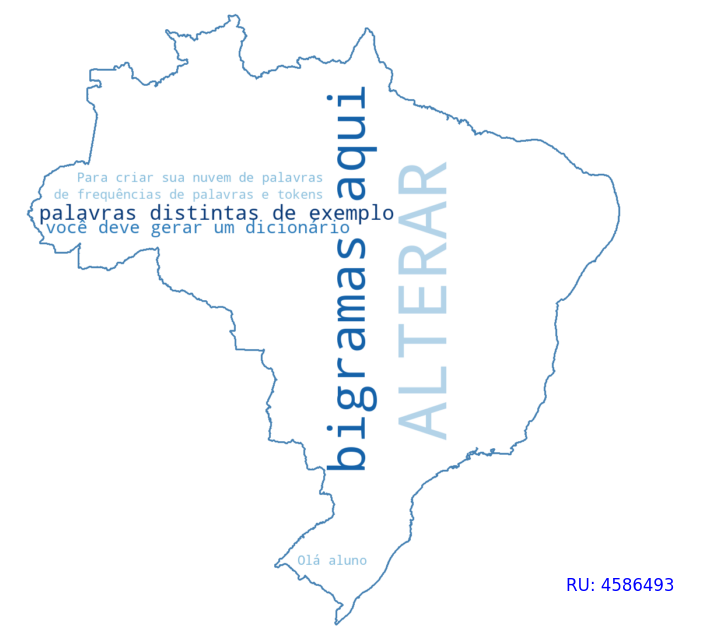

In [155]:
# Exemplo com dicionário de tokens unigramas e multigramas com frequências
words_dict = {'Olá aluno':1,
              'ALTERAR':4,
              'bigramas aqui':2,
              'palavras distintas de exemplo':2,
              'Para criar sua nuvem de palavras':1,
              'você deve gerar um dicionário':2,
              'de frequências de palavras e tokens':1}
gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                     arquivo_mascara="mapa_brasil_mask.png",
                     cor_texto='blue',  # Added cor_texto argument
                     cor_nuvem='Blues') # Added cor_nuvem argument

{'de palavras': np.int64(2), 'exemplo gerar': np.int64(1), 'gerar uma': np.int64(1), 'uma nuvem': np.int64(1), 'nuvem de': np.int64(1), 'palavras usando': np.int64(1), 'usando texto': np.int64(1), 'texto completo': np.int64(1), 'completo você': np.int64(1), 'você deve': np.int64(1), 'deve primeiro': np.int64(1), 'primeiro separar': np.int64(1), 'separar ele': np.int64(1), 'ele um': np.int64(1), 'um um': np.int64(1), 'um ou': np.int64(1), 'ou mais': np.int64(1), 'mais tokens': np.int64(1), 'tokens para': np.int64(1), 'para só': np.int64(1), 'só depois': np.int64(1), 'depois vetorizar': np.int64(1), 'vetorizar ao': np.int64(1), 'ao vetorizar': np.int64(1), 'vetorizar você': np.int64(1), 'você terá': np.int64(1), 'bag of': np.int64(1), 'of words': np.int64(1), 'words que': np.int64(1), 'que te': np.int64(1), 'te permitirá': np.int64(1), 'permitirá contar': np.int64(1), 'contar quantas': np.int64(1), 'quantas vezes': np.int64(1), 'vezes cada': np.int64(1), 'cada palavra': np.int64(1), 'pal

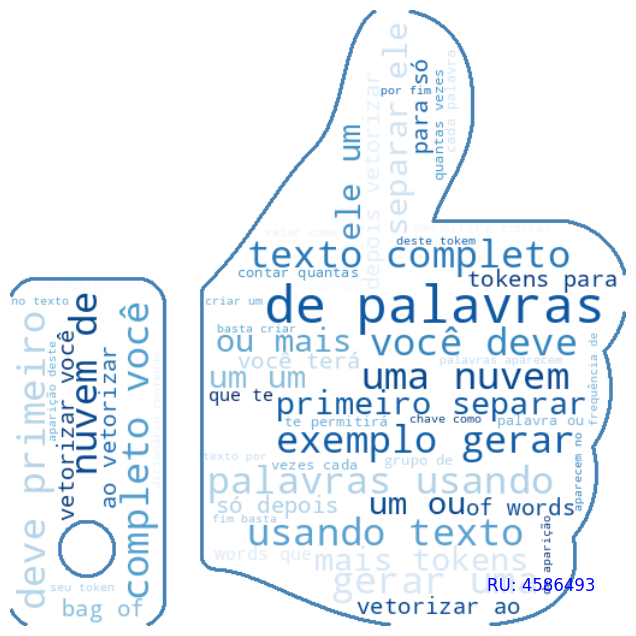

In [156]:
# Exemplo com uma frase completa
texto = """Exemplo: Gerar uma nuvem de palavras usando texto completo você deve
           primeiro separar ele um um ou mais tokens, para só depois vetorizar.
           Ao vetorizar você terá a bag of words, que te permitirá contar
           quantas vezes cada palavra ou grupo de palavras aparecem no texto.
           Por fim, basta criar um dicionário contendo a chave como o seu token
           e o valor como a frequência de aparição deste tokem."""
# Vetorização e contagem de frequência simples de bigramas:
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform([a+' '+b for a,b in (ngrams(texto.split(),2))])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_dict = dict(words_freq)
print(words_dict)

gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                      arquivo_mascara='thumbs_up_mask.png',
                      cor_texto='blue',  # Added cor_texto argument
                      cor_nuvem='Blues') # Added cor_nuvem argument